# Sample Dependence

Goal: for the hybrid training, look into the performance in mc16a, which has a *lower PU profile*.

Retraining Campaign - Dec 2018

In [47]:
import numpy as np
import h5py
import sys
import pandas as pd
import xarray as xr

sys.path.append("..")
from usefulFcts import *
from trainNet import *
from plottingFcts import *

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load in the model

In [48]:
subDir = 'mc16d_PFlow_hybrid_1.5TeV'
dataDir = '../data/'+subDir
vStr = "sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits"
dataTag = "6m_15trks_{}_sd0_rev".format(vStr)

modelDir = '../models/'+subDir
m = myLSTM(modelDir=modelDir, nFeatures=13, dataTag=dataTag, loadModel=True)

Initialize method from myModel()
Loading previously trained LSTM


## Get the efficiencies

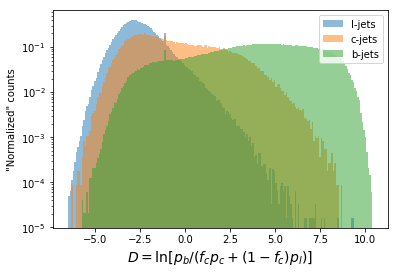

In [49]:
leffs, ceffs, beffs = [],[],[]

mcs = ['mc16d','mc16a']
physicsSamples = ['ttbar','Zprime_1.5TeV']

for physicsSample in physicsSamples:

    for mc in mcs:

        # Open the file
        subDir = '{}_PFlow_{}'.format(mc, physicsSample)
        dataDir = '../data/'+subDir
        dataTag = "2mtest_15trks_{}_sd0_rev_hybridScale".format(vStr)

        f_name = "{}/data_{}.hdf5".format(dataDir,dataTag)

        f = h5py.File(f_name,"r")
        X = f['X_test'][:]
        y = f['y_test'][:]
        ix = f['ix_test'][:]
        f.close()

        # Get the discriminant
        leff, ceff, beff = sigBkgEff(m, X, y, ix, subDir=subDir,
                                     tag='mc16d_hybrid_1.5TeV_training')
        leffs.append(leff)
        ceffs.append(ceff)
        beffs.append(beff)
    

## Evaluate on $t\bar{t}$

In [50]:
f.close()

In [51]:
%%bash
ls ../data/mc16a_PFlow_ttbar/

data_2mtest_15trks_sd0_sz0_nNextToInnHits_nInnHits_nsharedBLHits_nsplitBLHits_nsharedPixHits_nsplitPixHits_nsharedSCTHits_logNorm_ptfrac_dr_norm_nPixHits_nSCTHits_sd0_rev_hybridScale.hdf5
jet_2mtest_15trks_sd0_rev.h5
trk_2mtest_15trks_sd0_rev.nc


/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)


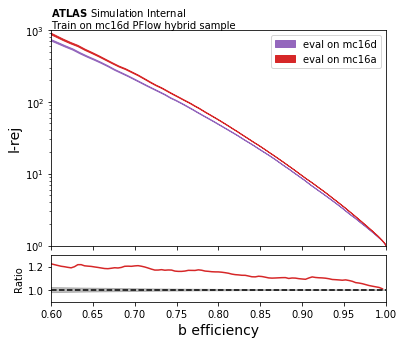

../plottingFcts.py:470: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)


In [64]:
labels = ['eval on mc16d','eval on mc16a']
colors = ['C4','C3']
nTest = 1.5e6

text="$\mathbf{ATLAS}$ Simulation Internal\n"
text+="Train on mc16d PFlow hybrid sample"

plotROCRatio(beffs[:2], leffs[:2], labels, rrange=(0.9,1.3),
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,subDir='mc16a_PFlow_ttbar',
             tag='lrej_mc16d_hybrid_1.5TeV_training')

plotROCRatio(beffs[:2], ceffs[:2], labels, rrange=(0.9,1.10),ymax=100,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,subDir='mc16a_PFlow_ttbar',
             tag='crej_mc16d_hybrid_1.5TeV_training')


Lesson: Training on the "harder problem" let's us solve for an optimal solution for mc16a as well.

## Evaluate on Z'

/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: divide by zero encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:165: RuntimeWarning: invalid value encountered in true_divide
  whmean = (w1/mk[:-1] + w2/mk[1:]) / (w1 + w2)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:117: RuntimeWarning: invalid value encountered in multiply
  d = ((2*h0 + h1)*m0 - h0*m1) / (h0 + h1)
../plottingFcts.py:470: RuntimeWarning: invalid value encountered in sqrt
  eff_err = lambda x, N: np.sqrt( x*(1-x) / N)
/gpfs/slac/atlas/fs1/d/nhartman/miniconda3/envs/py3_tf/lib/python3.6/site-packages/scipy/interpolate/_cubic.py:147: RuntimeWarning: invalid value encountered in true_divide
  mk = (y[1:] - y[:-1]) / hk


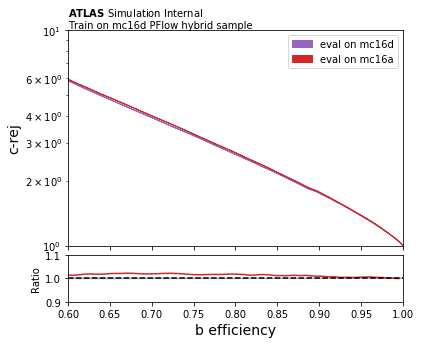

In [65]:
plotROCRatio(beffs[2:], leffs[2:], labels, rrange=(0.9,1.3),ymax=100,
             text=text,ylabel='l-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,subDir='mc16a_PFlow_Zprime_1.5TeV',
             tag='lrej_mc16d_hybrid_1.5TeV_training')

plotROCRatio(beffs[2:], ceffs[2:], labels, rrange=(0.9,1.10),ymax=10,
             text=text,ylabel='c-rej',binomialErrors=True,nTest=nTest, 
             colors=colors,subDir='mc16a_PFlow_Zprime_1.5TeV',
             tag='crej_mc16d_hybrid_1.5TeV_training')

The same conclusions hold for Z' as well, although the improvement in evaluating on mc16a might not be as drastic.